In [37]:
import sys
import os

import os
cwd = os.getcwd()
root_path = os.path.abspath('..')
sys.path.insert(0, root_path)


In [38]:
import numpy as np
from matplotlib import pyplot as plt

from utils.fs import RESULTS_RAW_DIR

In [39]:
def load_raw(start_time='1726410416', model_name='DAE', perspective_name='Order', level='trace'):
    result_path = os.path.join(RESULTS_RAW_DIR, f'result_{start_time}_{model_name}_{perspective_name}_{level}.npy')
    return np.load(result_path).flatten()

In [40]:
def load_raw_bulk(start_time='1726410416', model_name='DAE', level='trace'):
    order = load_raw(start_time=start_time, model_name=model_name, perspective_name='Order', level=level)
    arrival_time = load_raw(start_time=start_time, model_name=model_name, perspective_name='Arrival Time', level=level)
    attribute = load_raw(start_time=start_time, model_name=model_name, perspective_name='Attribute', level=level)
    workload = load_raw(start_time=start_time, model_name=model_name, perspective_name='Workload', level=level)
    return order, arrival_time, attribute, workload

In [41]:
order_trace, arrival_time_trace, attribute_trace, workload_trace = load_raw_bulk(start_time='1726410416', level='trace')
order_event, arrival_time_event, attribute_event, workload_event = load_raw_bulk(start_time='1726410416', level='event')
order_attr, arrival_time_attr, attribute_attr, workload_attr = load_raw_bulk(start_time='1726410416', level='attribute')

In [42]:
attribute_attr.shape

(300000,)

In [43]:
def percentage_above_threshold(array, threshold):
    """Calculate the percentage of values in the array that are above the given threshold."""
    total_count = len(array)
    count_above = np.sum(array > threshold)
    return (count_above / total_count) * 100  # Convert to percentage

def count_values_above_thresholds(array, interval=0.05):
    """Calculate the percentage of values above thresholds from 0 to 1 with the specified interval."""
    thresholds = np.arange(interval, 1 + interval, interval)
    percentages = {}

    for threshold in thresholds:
        percentage = percentage_above_threshold(array, threshold)
        percentages[threshold] = percentage
    
    return thresholds, percentages

In [44]:
def plot_threshold_percentages(array_list, names_list, interval=0.05):
    """Plot the percentage of values above thresholds for multiple arrays."""
    plt.figure(figsize=(12, 8))
    
    for array, name in zip(array_list, names_list):
        thresholds, percentages = count_values_above_thresholds(array, interval)
        plt.plot(thresholds, list(percentages.values()), marker='o', linestyle='-', label=name)
    
    plt.title('Percentage of Values Above Thresholds')
    plt.xlabel('Threshold')
    plt.ylabel('Percentage')

    # plt.xlim(left=0.2)
    # plt.ylim(top=0.5, bottom=0)
    
    plt.grid(True)
    plt.legend()
    plt.show()

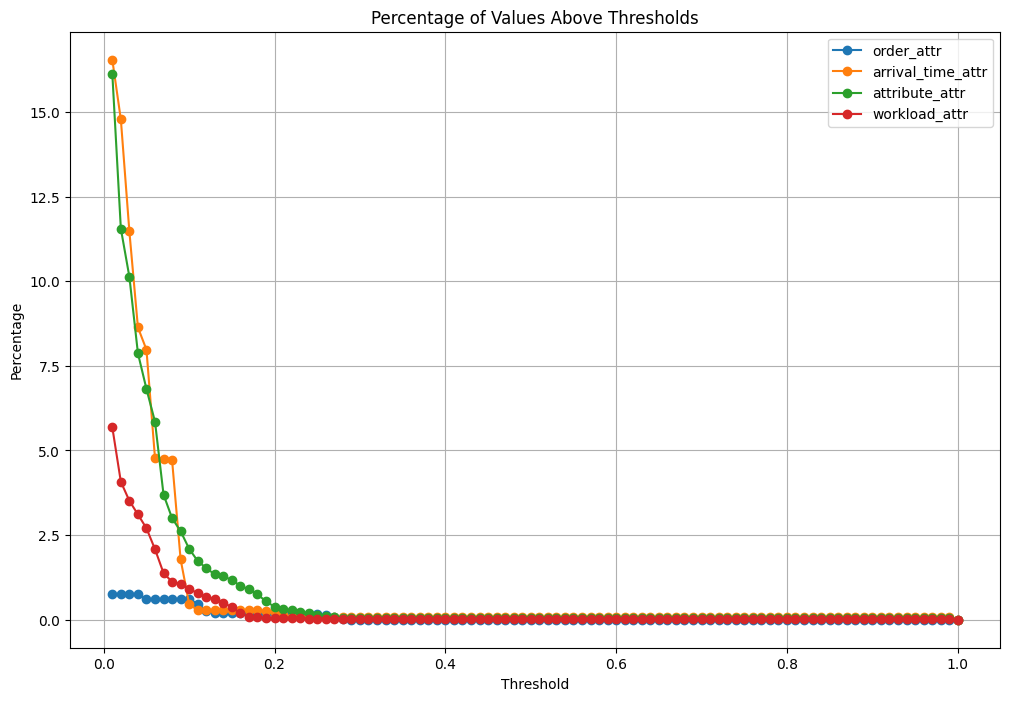

In [47]:
array_list = [order_attr, arrival_time_attr, attribute_attr, workload_attr]
names_list = ['order_attr', 'arrival_time_attr','attribute_attr', 'workload_attr']

plot_threshold_percentages(
    array_list=array_list,
    names_list=names_list, 
    interval=0.01)

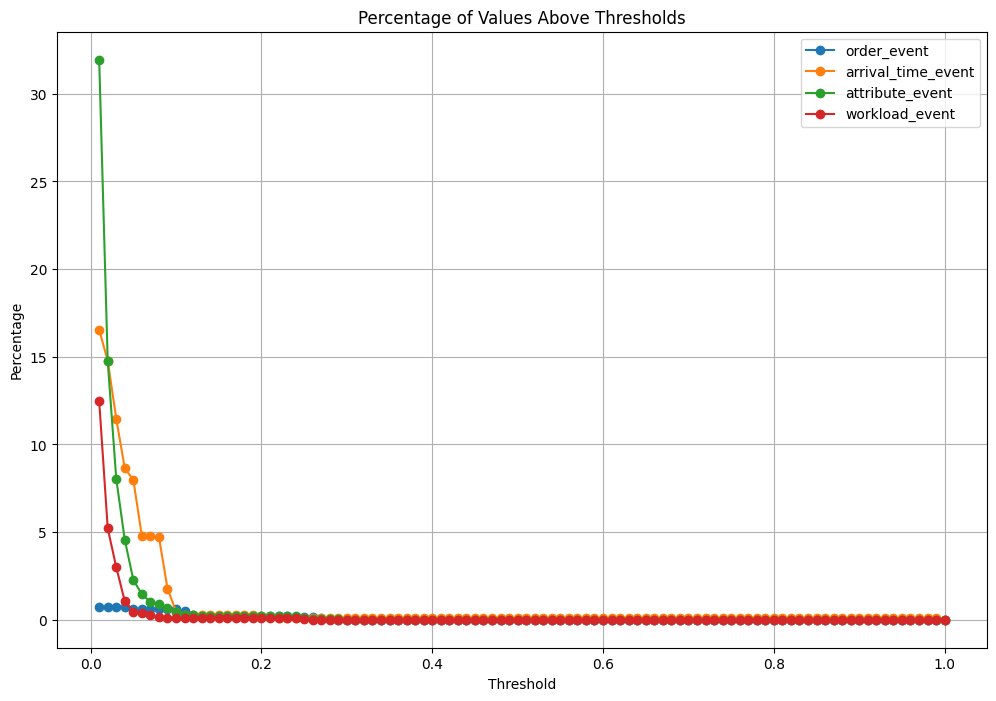

In [48]:
array_list = [order_event, arrival_time_event, attribute_event, workload_event]
names_list = ['order_event', 'arrival_time_event','attribute_event', 'workload_event']

plot_threshold_percentages(
    array_list=array_list,
    names_list=names_list, 
    interval=0.01)